# Приотизация гипотез. Анализ A/B теста

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы
подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных
### Данные для первой части
Файл  /datasets/hypothesis.csv

- Hypothesis  — краткое описание гипотезы;
- Reach  — охват пользователей по 10-балльной шкале;
- Impact  — влияние на пользователей по 10-балльной шкале;
- Confidence  — уверенность в гипотезе по 10-балльной шкале;
- Efforts  — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем
больше значение  Efforts , тем дороже проверка гипотезы.

### Данные для второй части
Файл  /datasets/orders.csv

- transactionId  — идентификатор заказа;
- visitorId  — идентификатор пользователя, совершившего заказ;
- date  — дата, когда был совершён заказ;
- revenue  — выручка заказа;
- group  — группа A/B-теста, в которую попал заказ.

Файл  /datasets/visitors.csv
- date  — дата;
- group  — группа A/B-теста;
- visitors  — количество пользователей в указанную дату в указанной группе
A/B-теста


## Часть 1. Приоритизация гипотез.
В файле  hypothesis.csv  9 гипотез по увеличению выручки интернет-магазина с
указанными параметрами  Reach ,  Impact ,  Confidence ,  Effort .

**Задача**

Примените фреймворк  ICE  для приоритизации гипотез. Отсортируйте их по
убыванию приоритета.

Примените фреймворк  RICE  для приоритизации гипотез. Отсортируйте их по
убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при
применении  RICE  вместо  ICE . Объясните, почему так произошло.

## Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в
файлах  orders.csv  и  visitors.csv .

**Задача**

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и
предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы
и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека
группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и
предположения
5. Постройте график относительного изменения кумулятивной конверсии группы
B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте
выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и
предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для
определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами
по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между
группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами
по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между
группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

## Содержание <a id="cont"></a>

[Подготовка данных к анализу](#step0)

[Часть 1. Приоритизация гипотез](#step1)
- [Приоретизация гипотез с помощью  фреймворка  ICE](#step11)
    
- [Приоретизация гипотез с помощью  фреймворка  RICE](#step12)
    
- [Выводы. Разница между приотизацией гипотез с использованием RICE вместо ICE](#step13)

[Часть 2. Анализ A/B-теста](#step2)

- [График кумулятивной выручки по группам](#step21)
- [График кумулятивного среднего чека по группам](#step22)
- [График относительного изменения кумулятивного среднего чека группы B к группе A](#step23)
- [График кумулятивной конверсии по группам](#step24)
- [График относительного изменения кумулятивной конверсии группы B к группе A](#step25)

    [Анализ  выбросов и всплесков](#step3)
    - [Точечный график количества заказов по пользователям. 95-й и 99-й перцентили](#step31)
    - [Точечный график стоимостей заказов. 95-й и 99-й перцентили](#step32)
    - [Статистическая значимость различий в конверсии между группами по «сырым» данным](#step33)
    -[Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step34)
    - [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#step35)
    -[Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step36)

[Решение по результатам теста](#step4)

## Подготовка данных к анализу
<a id="step0"></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

# Загрузка данных
try: 
    visitors = pd.read_csv('visitors.csv') # данные о посещениях
    orders = pd.read_csv('orders.csv')  # данные о покупках 
    hypothesis = pd.read_csv('hypothesis.csv') # данные о гипотезах по увеличению выручки
except: 
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
   
Отдельный плюс за `try/except` 😎

In [2]:
for data in [visitors, orders, hypothesis]:
    display(data.head())
    display(data.info())
    print('Явные дубликаты:')
    display(data.duplicated().sum())
    print()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Явные дубликаты:


0

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Явные дубликаты:


0

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Явные дубликаты:


0

Явных дубликатов и пропусков нет, необходимо преобразовать данные о времени:

In [3]:
# приведем названия столбцов к нижнему регистру и уберем пробелы
hypothesis.columns = data.columns.str.lower()
    
# преобразование данных о времени
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

**Вывод**
- Явных дубликатов и пропусков нет
- Изменила тип данных даты

## Часть 1. Приоритизация гипотез.
<a id="step1"></a>  

### 1.  Приоретизация гипотез с помощью  фреймворка  ICE
<a id="step11"></a>  

In [4]:
hypothesis['number'] = [1,2,3,4,5,6,7,8,9]
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).astype('int')
pd.options.display.max_colwidth = 100
hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'number', 'ICE']]

,hypothesis,number,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",9,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",8,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",7,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",4,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",5,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",6,1


In [5]:
print('Приоритезация гипотез методом ICE в порядке убывания приоритета:', np.array(hypothesis.sort_values(by='ICE', ascending=False)['number']))

Приоритезация гипотез методом ICE в порядке убывания приоритета: [9 1 8 7 3 2 4 5 6]


Наиболее перспективные гипотезы по ICE: 9, 1, 8, 7.

### 2.  Приоретизация гипотез с помощью  фреймворка  RICE
<a id="step12"></a>

In [6]:
hypothesis['RICE'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).astype('int')
hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis', 'number', 'RICE']]

,hypothesis,number,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",8,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",3,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",7,40
8,"Запустить акцию, дающую скидку на товар в день рождения",9,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",4,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",6,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",5,3


In [7]:
print('Приоритезация гипотез методом RICE в порядке убывания приоритета:', np.array(hypothesis.sort_values(by='RICE', ascending=False)['number']))

Приоритезация гипотез методом RICE в порядке убывания приоритета: [8 3 1 7 9 4 2 6 5]


Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7.

### 3.  Выводы. Разница между приотизацией гипотез с использованием RICE вместо ICE
<a id="step13"></a>

Наиболее перспективные гипотезы по ICE: 9, 1, 8, 7.

Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7.

Ранжирование в зависимости от фреймворка различается, это связано с тем, что при использовании фреймворка ICE (в отличие от RICE) не учитывается охват изменений. Это важная составляющая анализа изменений, тк она учитывает внешние факторы, в которых функционирует компания: деятельность конкурентов, оценку объема рынка - поэтому ее следует считать приоритетной.

In [8]:
display(hypothesis[['ICE', 'RICE']].describe().T)
hypothesis.sort_values(by='RICE', ascending=False).style.background_gradient('GnBu')

,count,mean,std,min,25%,50%,75%,max
ICE,9.0,6.666667,5.766281,1.0,1.0,7.0,11.0,16.0
RICE,9.0,31.555556,35.875169,3.0,4.0,16.0,40.0,112.0


,hypothesis,reach,impact,confidence,efforts,number,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,8,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,1,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,7,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,9,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,4,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,6,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,5,1,3


Таким образом, наиболее перспективными гипотезами следует считать гипотезы под номерами:

- **8**   - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- **3**	  - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- **1**	  - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- **7**	  - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

При этои наиболее сильным преимуществом по охвату пользователей из данных гипотез обладает гипотеза под номером 8 (параметр reach =10) и 7 (параметр reach =5)

## Часть 2. Анализ A/B-теста
<a id="step2"></a>  

Проверим корректность разбиения пользователей на группы:

- Количество пользователей в различных группах различается не более, чем на 1%;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста.

Ключевая метрика в данном анализе - конверсия. 

Чтобы исправить проблему подглядывания, размер выборки определяют до начала теста. Калькулятор 

In [9]:
print('Количество посетителей в группе A:', visitors.query('group == "A"')['visitors'].sum())
print('Количество посетителей в группе B:', visitors.query('group == "B"')['visitors'].sum())
print('Количество пользователей в различных группах различается на', 
      round(abs((1-visitors.query('group == "A"')['visitors'].sum()/visitors.query('group == "B"')['visitors'].sum())*100), 2))

Количество посетителей в группе A: 18736
Количество посетителей в группе B: 18916
Количество пользователей в различных группах различается на 0.95


In [34]:
convA = len(orders.query('group == "A"'))/visitors.query('group == "A"')['visitors'].sum()
convB = len(orders.query('group == "B"'))/visitors.query('group == "B"')['visitors'].sum()
print('Конверсия в группе A', round(convA*100, 2), '%')
print('Конверсия в группе B', round(convB*100, 2), '%')
print('Абсолютная разница в конверсии в группах A и B',
     round(abs(convA-convB)*100, 2), '%')


Конверсия в группе A 2.5 %
Конверсия в группе B 2.9 %
Абсолютная разница в конверсии в группах A и B 0.4 %


Все в порядке, идем дальше. 

Проверим, есить ли пользователи, которые попали в две группы одновременно:


In [11]:
badOrders = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique').query('group >1')
badValues = list(badOrders.index)
print('Количество пользователей, совершивших покупку и попавших в обе группы:', len(badOrders), ', что составляет', round((len(badOrders)/len(orders))*100, 2), '% от общего числа покупателей')

Количество пользователей, совершивших покупку и попавших в обе группы: 58 , что составляет 4.85 % от общего числа покупателей


Удалим эти значения

In [12]:
originalOrders = orders.copy()

In [13]:
orders = orders.query('visitorId not in @badValues')

Проверим сроки проведения теста и данные на входе по посещениям:

In [14]:
print(orders['date'].max())
print(orders['date'].min())
orders['date'].max()-orders['date'].min()

2019-08-31 00:00:00
2019-08-01 00:00:00


Timedelta('30 days 00:00:00')

In [15]:
print(visitors['date'].max())
print(visitors['date'].min())
visitors['date'].max()-visitors['date'].min()

2019-08-31 00:00:00
2019-08-01 00:00:00


Timedelta('30 days 00:00:00')

Все отлично.

Посмотрим с помощью [калькулятора](https://www.evanmiller.org/ab-testing/sample-size.html) на необходимые сроки для проведения теста.

- Первоначальная конверсия:2,97%
- После теста: 3,38%
- Абсолютная разница в изменении конверсии составила 0.41%

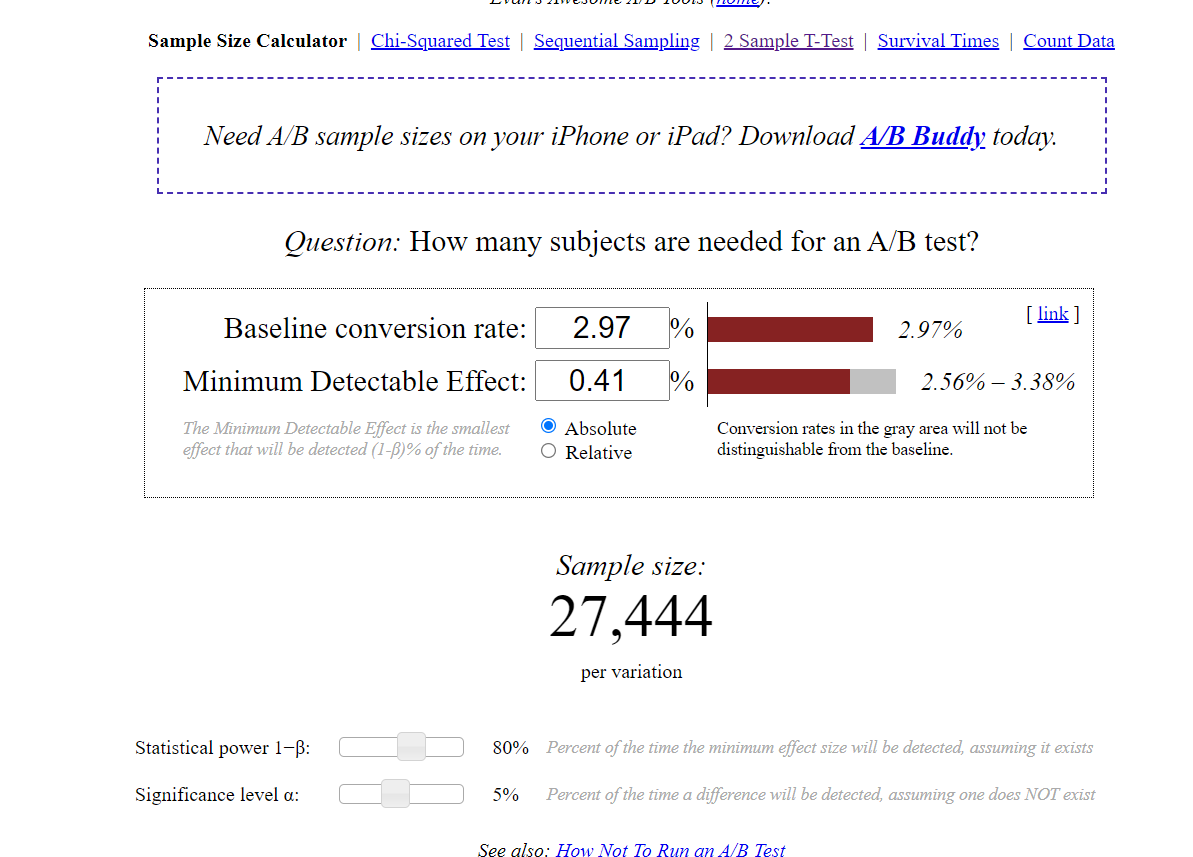

Минимальный размер выборки по калькулятору составил 27,444. У нас 37 652 наблюдений.

По количеству наблюдений все ок - их достаточно для проведения теста.

### График кумулятивной выручки по группам
<a id="step21"></a> 

Подготовим данные для рассчета метрик:

In [35]:
# создаем массив уникальных пар значений дат и групп теста, избавляемся от дубликатов
datesGroups = orders[['date','group']].drop_duplicates()

# создаем ordersAggregated - строки таблицы orders, дата котрых меньше или равна 
# дате элемента из datesGroups, а группа теста равна группе из datesGroups
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',                # Вычислим макс. дату,
            'group': 'max',               # группу теста (чтобы не пропал столбец)
            'transactionId': 'nunique',   # число уник. заказов 
            'visitorId': 'nunique',       # и пользователей
            'revenue': 'sum',             # Подсчитаем сумму средних чеков
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Аналогично получим агрегированные кумулятивные по дням данные о посетителях 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
          }
         ), 
    axis=1,
).sort_values(by=['date', 'group'])

# объединение данных таблиц
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# расчет конверсии
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

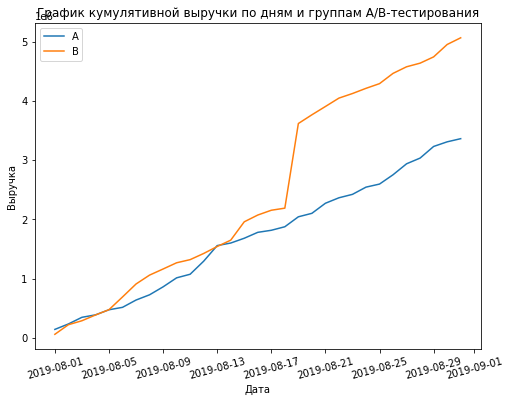

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(8,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=15)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.show()

**Вывод**

Выручка увеличивается на протяжении всего теста, выручка группы B стабильно больше выручки группы A и характеризуется резким скачком 19-20 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам
<a id="step22"></a> 

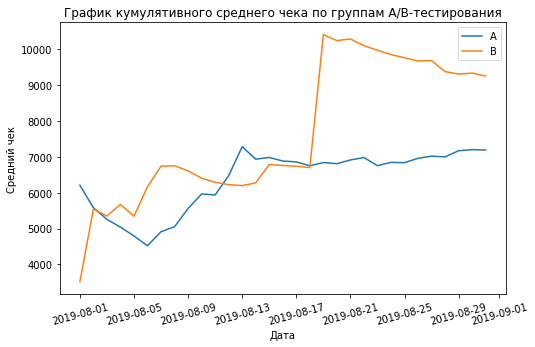

In [37]:
plt.figure(figsize=(8,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=15)
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам A/B-тестирования')
plt.show()

**Вывод**

Средний чек группы B почти все время был выше, однако опять произошел резкий скачок среднего чека 19-20 августа, после чего он начинает падать. Думаю это связано со скачком выручки в группе тоже приходящейся на эти данные. Следует посмотреть наличие аномалий в данных.

## График относительного изменения кумулятивного среднего чека группы B к группе A
<a id="step23"></a> 

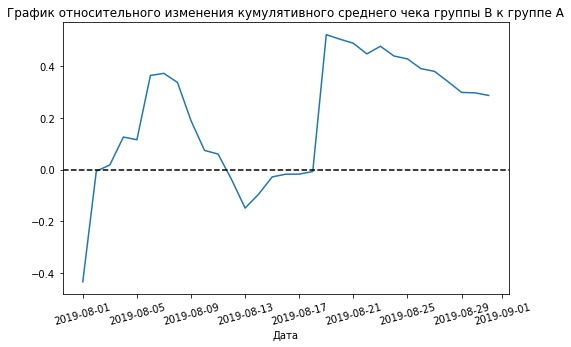

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(8,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

**Вывод**

В нескольких точках график различия между сегментами резко «скачет». Стоит проверить на наличие аномалий - слишком крупных чеков.

## График кумулятивной конверсии по группам
<a id="step24"></a> 

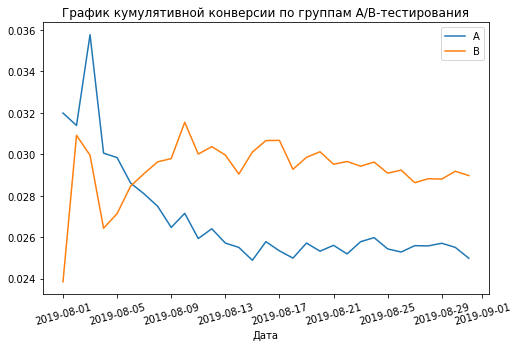

In [39]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(8,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.title('График кумулятивной конверсии по группам A/B-тестирования')
plt.show()

**Вывод**

У группы B конверсия стабильно больше, чем у группы A.

## График относительного изменения кумулятивной конверсии группы B к группе A
<a id="step25"></a> 

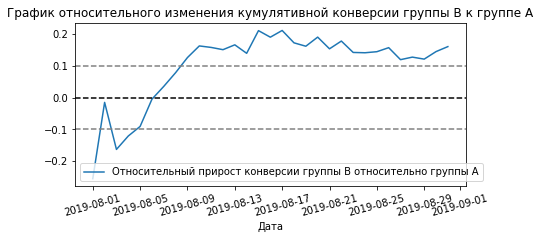

In [40]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B'])
                              )

# строим графики
plt.figure(figsize=(7,3))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

**Вывод**

В начале теста группа B значительно проигрывала группе A однако характеризовалась ростом конверсии относительно группы A, через неделю закрепила позиции: конверсия группы B стаблильно больше конверсии группы A на 10%. 

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

## Анализ выбросов и всплесков
<a id="step3"></a> 

### Точечный график количества заказов по пользователям. 95-й и 99-й перцентили
<a id="step31"></a> 

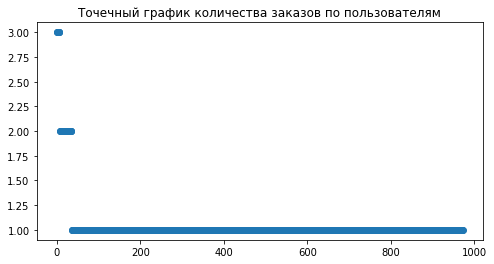

In [41]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers = ordersByUsers.sort_values(by='orders',ascending=False)

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

**Вывод**

В большинстве случаев пользователь совершал только один заказ.

In [42]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

**Вывод**

Не более 1% пользователей совершали 2 заказа. Помним, что данные в orders были изменены из-за того, что некоторые пользователи вошли в 2 теста сразу - oтпали и другие аномальные значения

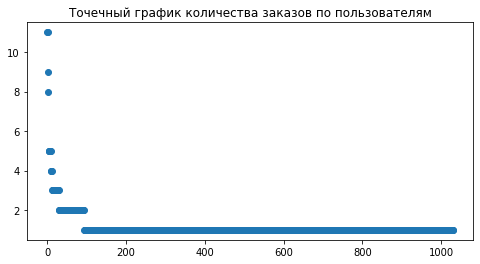

[1. 2. 4.]


In [43]:
ordersByUsers1 = originalOrders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers1.columns = ['visitorId', 'orders']
ordersByUsers1 = ordersByUsers1.sort_values(by='orders',ascending=False)

x_values = pd.Series(range(0,len(ordersByUsers1)))
plt.figure(figsize=(8,4))
plt.scatter(x_values, ordersByUsers1['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

print(np.percentile(ordersByUsers1['orders'], [90, 95, 99]))

Исходя из этого, следует принять количество заказов меньше или равным 2 за норму в очищенном датасете orders, тк данные в orders были изменены из-за того, что некоторые пользователи вошли в 2 теста сразу.

### Точечный график стоимостей заказов. 95-й и 99-й перцентили
<a id="step32"></a> 

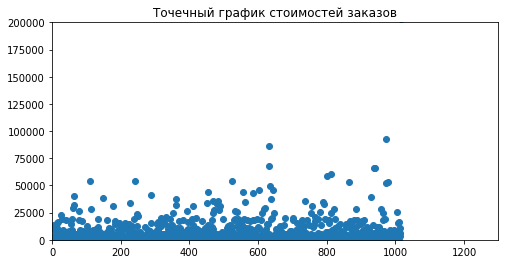

[26785. 53904.]


In [91]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(8,4))
#plt.ylim(0, 0.5)
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1300, 0, 200000])
plt.show()

print(np.percentile(orders['revenue'], [95, 99]))

В очищенных данных 5% заказов превышают 26785 и 1% более 53904. 

Помним, что данные в orders были изменены из-за того, что некоторые пользователи вошли в 2 теста сразу - oтпали и другие аномальные значения:

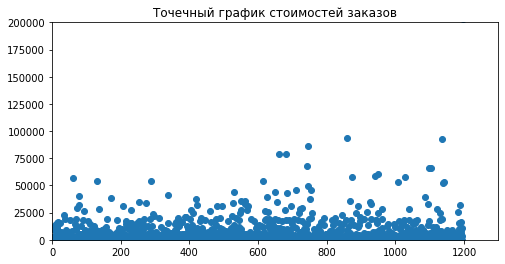

In [90]:
x_values = pd.Series(range(0,len(originalOrders['revenue'])))
plt.figure(figsize=(8,4))
plt.scatter(x_values, originalOrders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1300, 0, 200000])

plt.show()

5% заказов превышают 28000 и 1% более 58233.2 в изначальных данных

**Вывод**

За аномальные значения возьмем заказы, превышающие 26785 по очищенным данным. 

В "хороший" список входят пользователи, совершившие 1 или 2 заказа. 

### Статистическая значимость различий в конверсии между группами по «сырым» данным.
<a id="step33"></a> 

Сформулируем гипотезы:

- H0: статистически значимых различий в конверсии между группами нет
- H1: статистически значимые различия в конверсии между группами есть

Для расчета р-value будем использовать напараметрический тест Уилкоксона-Манна-Уитни, так как тест устойчив к выбросам данных - он учитывает не значения параметров, а их ранги. 

In [27]:
# Создадим таблицу с количеством пользователей в выбранную дату для каждой группы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Таблица с кумулятивными данными по посещениям для каждой из групп
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов и суммарная выручка в выбранную дату в группе A;
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}) 
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA'] 

# суммарное число заказов до выбранной даты включительно в группе A;
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество заказов и суммарная выручка в выбранную дату в группе B;
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное число заказов до выбранной даты включительно в группе B;
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Таблица с сырыми кумулятивными данными, где:
# date — дата;
# ordersPerDateA — количество заказов в выбранную дату в группе A;
# revenuePerDateA — суммарная выручка в выбранную дату в группе A;
# ordersPerDateB — количество заказов в выбранную дату в группе B;
# revenuePerDateB — суммарная выручка в выбранную дату в группе B;
# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
# ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
# visitorsPerDateA — количество пользователей в выбранную дату в группе A;
# visitorsPerDateB — количество пользователей в выбранную дату в группе B;
# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [28]:
# создадим таблицы, в которых для пользователей, которые сделали хотя бы 1 заказ, 
# укажем число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# создадим таблицы, в которых пользователям из разных групп будет соответствовать 
# количество заказов.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
alpha = 0.05

if p_value < alpha:
    print('Принимаем альтернативную гипотезу: различия в конверсии между группами есть и они статистически значимы')

elif p_value > alpha:
    print('Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем.')

print('p_value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный проигрыш/прирост конверсии группы B равен', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Принимаем альтернативную гипотезу: различия в конверсии между группами есть и они статистически значимы
p_value = 0.011
Относительный проигрыш/прирост конверсии группы B равен 0.160


**Вывод**

Различия в конверсии между группами есть и они статистически значимы. Относительный прирост конверсии группы B равен 16,0%. 

Из расчетов, произведенных ранее:

- Конверсия в группе A 2.97 %
- Конверсия в группе B 3.38 %

Возможно, такая разница связана с количеством транзакций в группах, так как разница в количестве пользователей выборки менее 1%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
<a id="step34"></a> 

Сформулируем гипотезы:

- H0: статистически значимых различий в среднем чеке между группами нет
- H1: статистически значимые различия в среднем чеке между группами есть

Для расчета р-value снова будем использовать напараметрический тест Уилкоксона-Манна-Уитни, так как тест устойчив к выбросам данных - он учитывает не значения параметров, а их ранги. 

In [29]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05

if p_value < alpha:
    print('Принимаем альтернативную гипотезу: различия в среднем чеке между группами есть и они статистически значимы')

elif p_value > alpha:
    print('Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.')

print('p_value =', "{0:.3f}".format(p_value))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.
p_value = 0.829
0.287


**Вывод**

Принимаем нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет. Впрочем, средний чек группы B значительно выше среднего чека группы A (на 28,7%). Думаю, такой перекос обоснован тем, что 95 и 99 перцентили равны 26785 и 53904 соответственно, что значительно смещает среднее выборки.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.
<a id="step35"></a> 

Узнаем, сколько всего аномальных пользователей: совершивших более 2-х заказов и на сумму более 26785.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
58


Всего таких пользователей 58. Узнаем как их действия повлияли на результаты теста.

Сформулируем гипотезы:

- H0: статистически значимых различий в конверсии между группами нет
- H1: статистически значимые различия в конверсии между группами есть

Для расчета р-value будем использовать напараметрический тест Уилкоксона-Манна-Уитни.

In [31]:
# Подговим выборки количества заказов по пользователям внутри групп теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
# Применим критерий Манна-Уитни
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
alpha = 0.05

if p_value < alpha:
    print('Принимаем альтернативную гипотезу: различия в конверсии между группами по очищенным данным есть и они статистически значимы')

elif p_value > alpha:
    print('Нулевую гипотезу о том, что статистически значимых различий в конверсии по очищенным данным между группами нет, не отвергаем.')

print('p_value =', "{0:.3f}".format(p_value))
print('Относительный проигрыш/прирост конверсии группы B равен', "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


Принимаем альтернативную гипотезу: различия в конверсии между группами по очищенным данным есть и они статистически значимы
p_value = 0.012
Относительный проигрыш/прирост конверсии группы B равен 0.182


**Вывод**

Результаты по конверсии практически не изменились, но по очищенным данным прирост конверсии составил 18,2% (против 16,0% по неочищенным).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.
<a id="step36"></a> 

Сформулируем гипотезы:

- H0: статистически значимых различий в среднем чеке по «очищенным» данным между группами нет
- H1: статистически значимые различия в среднем чеке по «очищенным» данным между группами есть

Для расчета р-value снова будем использовать напараметрический тест Манна-Уитни. 

In [33]:
p_value = stats.mannwhitneyu(
    orders[
        np.logical_and(
        orders['group'] == 'A',
        np.logical_not(
        orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'],
    orders[
        np.logical_and(
        orders['group'] == 'B',
        np.logical_not(
        orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue']

)[1]

alpha = 0.05

if p_value < alpha:
    print('Принимаем альтернативную гипотезу: различия в среднем чеке между группами есть и они статистически значимы')

elif p_value > alpha:
    print('Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.')

print('p_value =', "{0:.3f}".format(p_value))
print('{0:.3f}'.format(orders[
        np.logical_and(
        orders['group'] == 'B',
        np.logical_not(
        orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'].mean()
                       /orders[
        np.logical_and(
        orders['group'] == 'A',
        np.logical_not(
        orders['visitorId'].isin(abnormalUsers))
        )
    ]['revenue'].mean()
                       -1
                      )
     )


Нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.
p_value = 0.646
-0.048


**Вывод**

Cтатистически значимых различий в конверсии между группами нет, но в сравнении с сырыми данными, P-value уменьшился и после очистки разница между средними чеками составила менее 5%.

**Общий вывод по аномалиям**

Общие выводы по результатам теста не изменились:
- различия в конверсии между группами по очищенным и сырым данным есть и они статистически значимы
- статистически значимых различий в среднем чеке между группами нет (по очищенным и сырым данным)

## Решение по результатам теста
<a id="step4"></a> 

Имеющиеся факты:
- различия в конверсии между группами по очищенным и сырым данным есть и они статистически значимы
- статистически значимых различий в среднем чеке между группами нет (по очищенным и сырым данным)
- По очищенным данным прирост конверсии группы B относительно группы A составил 18,2% (против 16,0% по неочищенным)
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A
- По графику среднего чека видно, что средний чек группы B лучше среднего чека группы A.

Исходя из обнаруженных фактов, тест следует остановить и признать успешным группу B: она показывает лучшую конверсию, хоть и различия в среднем чеке не имеют статистической значимости, что в долгосрочной перспективе может повлиять на рост выручки за счет эффекта масштаба.

[К содержанию](#cont)